In [57]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

# Statistical testing
from scipy import stats

# Settings
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [59]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   ob

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
TotalCharges nulls after conversion: 11
Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


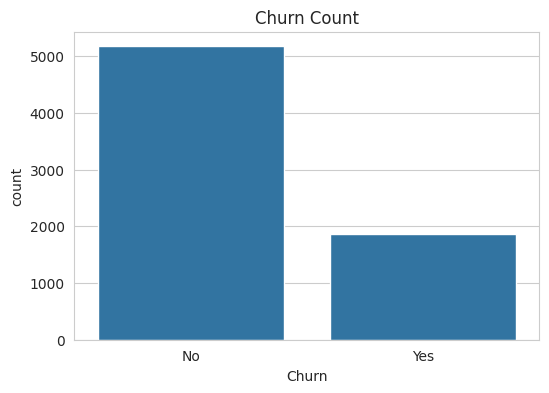

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


<Figure size 1200x600 with 0 Axes>

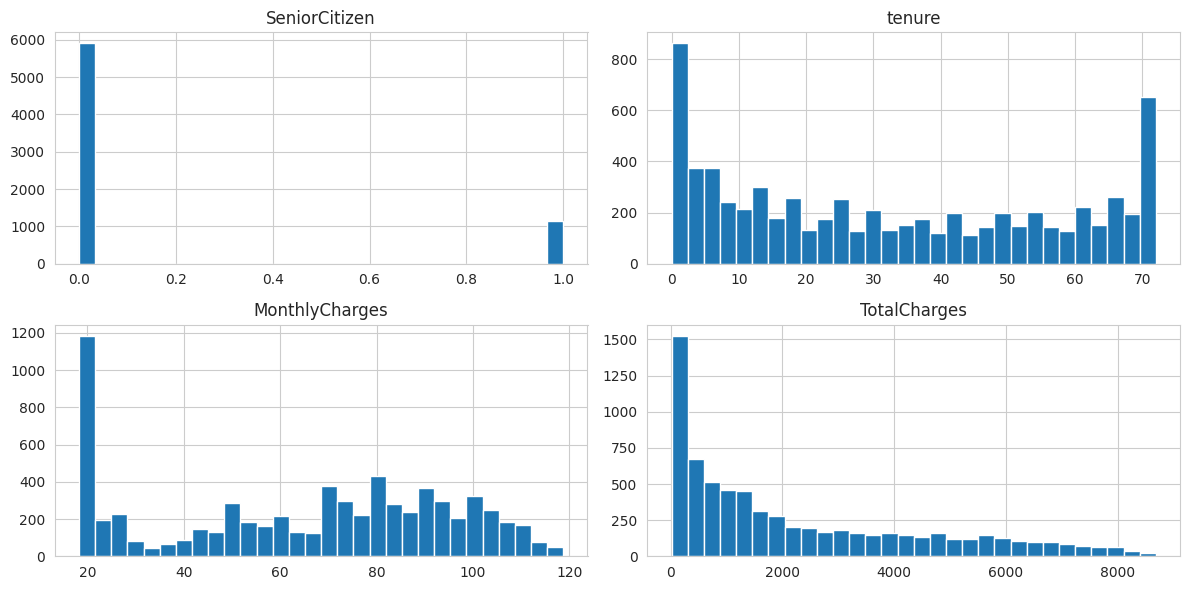

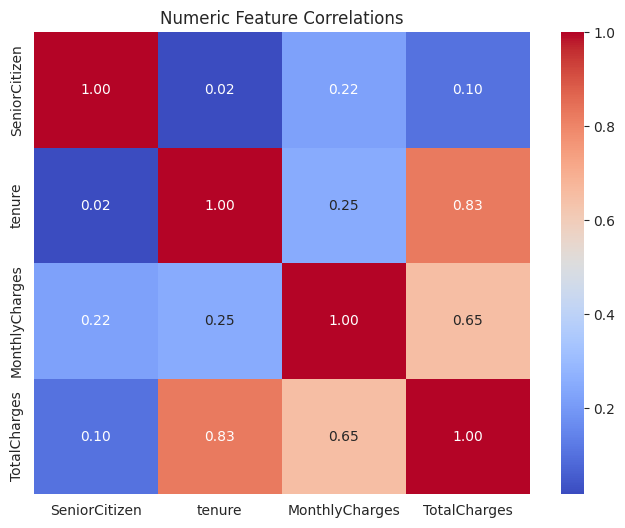

In [60]:
# Initial Data Exploration
print('Shape:', df.shape)
display(df.head())

print('Info:')
df.info()

print('Summary (include all):')
display(df.describe(include='all').T)

# Missing values
print('Missing values per column:')
print(df.isnull().sum())

# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('TotalCharges nulls after conversion:', df['TotalCharges'].isnull().sum())

# Churn distribution
print('Churn distribution:')
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True)*100)

# Visualization settings
sns.set_style('whitegrid')

# Basic plots
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

# Numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print('Numeric columns:', numeric_cols)
if len(numeric_cols):
    display(df[numeric_cols].describe().T)
    plt.figure(figsize=(12,6))
    df[numeric_cols].hist(bins=30, figsize=(12,6))
    plt.tight_layout()
    plt.show()

# Correlation heatmap for numeric cols
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Numeric Feature Correlations')
    plt.show()

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No          

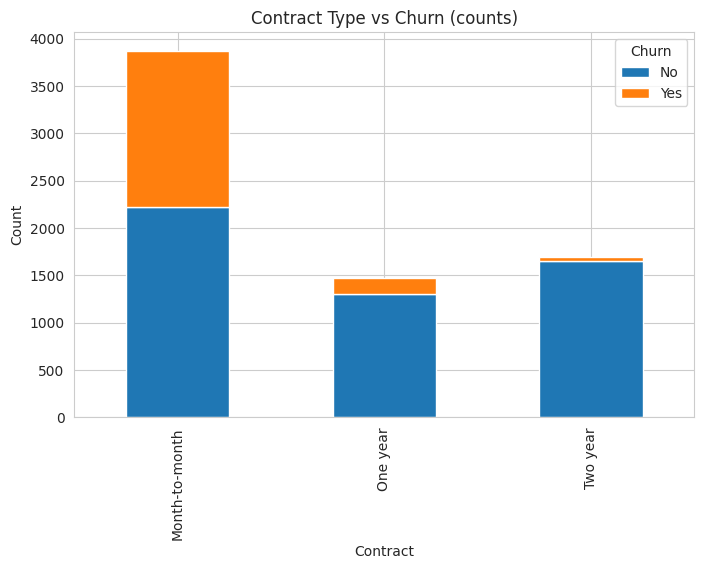

High-cardinality categorical columns: []


In [61]:
# Categorical exploration
cat_cols = df.select_dtypes(include=['object']).columns.drop(['customerID','Churn'])
print('Categorical columns:', list(cat_cols))
for col in cat_cols:
    print(df[col].value_counts().head(10))

# Cross-tab: Contract vs Churn
if 'Contract' in df.columns:
    ct = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
    #display(ct)
    ct_plot = pd.crosstab(df['Contract'], df['Churn'])
    ct_plot.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title('Contract Type vs Churn (counts)')
    plt.ylabel('Count')
    plt.show()

# Quick check for high-cardinality categorical features
high_card = [c for c in cat_cols if df[c].nunique() > 20]
print('High-cardinality categorical columns:', high_card)

Tenure summary:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


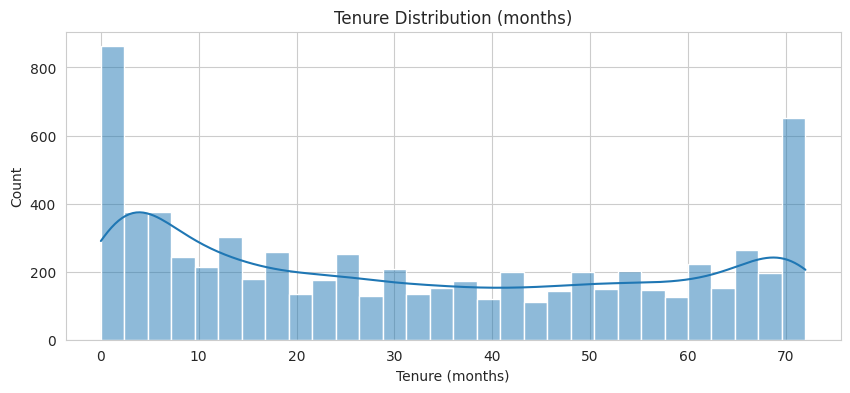

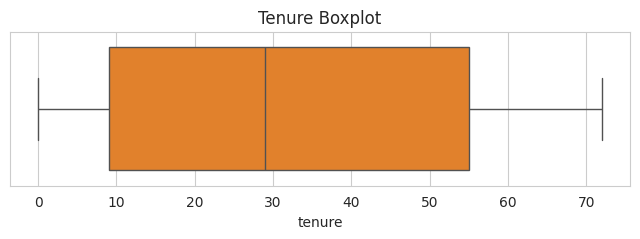

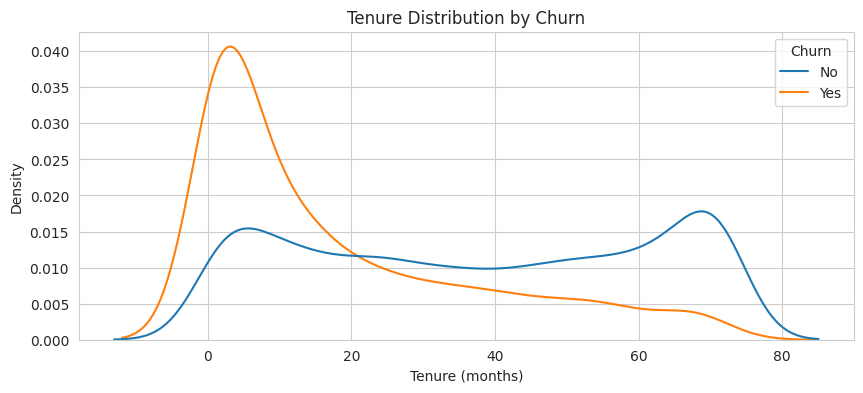


Churn rate by tenure bin (fraction):
tenure_bin
0-6      0.529372
7-12     0.358865
13-24    0.287109
25-48    0.203890
49-72    0.095132
Name: Churn, dtype: float64


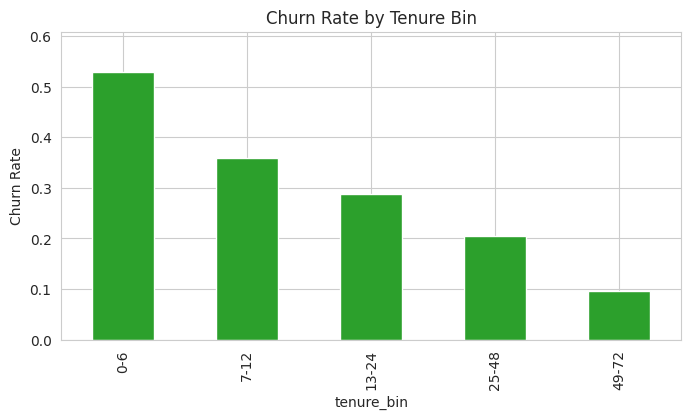

In [62]:
# Tenure distribution and relationship with Churn
ten = df['tenure'].dropna()
print('Tenure summary:')
print(ten.describe())



# Histogram + KDE
plt.figure(figsize=(10,4))
sns.histplot(ten, bins=30, kde=True, color='C0')
plt.title('Tenure Distribution (months)')
plt.xlabel('Tenure (months)')
plt.show()

# Boxplot to check outliers
plt.figure(figsize=(8,2))
sns.boxplot(x=ten, color='C1')
plt.title('Tenure Boxplot')
plt.show()

# KDE by Churn status
if 'Churn' in df.columns:
    plt.figure(figsize=(10,4))
    sns.kdeplot(data=df, x='tenure', hue='Churn', common_norm=False)
    plt.title('Tenure Distribution by Churn')
    plt.xlabel('Tenure (months)')
    plt.show()

# Create tenure bins and compute churn rate per bin
bins = [0,6,12,24,48,72]
labels = ['0-6','7-12','13-24','25-48','49-72']
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)
churn_rate = df.groupby('tenure_bin')['Churn'].apply(lambda x: (x=='Yes').mean())

print('\nChurn rate by tenure bin (fraction):')
print(churn_rate)

# Plot churn rate by tenure bin
plt.figure(figsize=(8,4))
churn_rate.plot(kind='bar', color='C2')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Bin')
plt.ylim(0, churn_rate.max()*1.15)
plt.show()


In [63]:
df_clean = df.copy()

# Fix TotalCharges (stored as object, should be numeric)
print("\n Converting TotalCharges to numeric...")
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check missing values in TotalCharges
missing_charges = df_clean['TotalCharges'].isnull().sum()
print(f"   Missing values in TotalCharges: {missing_charges}")

if missing_charges > 0:
    print(f"   Filling {missing_charges} missing values with 0 (likely new customers)")
    df_clean['TotalCharges'].fillna(0, inplace=True)

# Convert Churn to binary
print("\n Converting Churn to binary (0/1)...")
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})




df_model = df_clean.copy()

# Drop customerID
df_model = df_model.drop('customerID', axis=1)
print("Dropped customerID column")

# Create new features
print("\nCreating new features...")

# 1. Charges per month
df_model['ChargesPerMonth'] = df_model['TotalCharges'] / (df_model['tenure'] + 1)
print("ChargesPerMonth: TotalCharges / (tenure + 1)")

# 2. Tenure groups
df_model['TenureGroup'] = pd.cut(df_model['tenure'], 
                                  bins=[0, 12, 24, 48, 72], 
                                  labels=['0-1yr', '1-2yr', '2-4yr', '4+yr'])
print(" TenureGroup: Binned tenure into 4 categories")

# 3. Service count
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_model['ServiceCount'] = 0
for col in service_cols:
    if col in df_model.columns:
        df_model['ServiceCount'] += (df_model[col] != 'No').astype(int)
print("ServiceCount: Total number of services subscribed")

# 4. Has tech support
df_model['HasTechSupport'] = (df_model['TechSupport'] == 'Yes').astype(int)
print("  HasTechSupport: Binary indicator")

# 5. Senior citizen with partner
df_model['SeniorWithPartner'] = (df_model['SeniorCitizen'] == 1) & (df_model['Partner'] == 'Yes')
df_model['SeniorWithPartner'] = df_model['SeniorWithPartner'].astype(int)


 Converting TotalCharges to numeric...
   Missing values in TotalCharges: 11
   Filling 11 missing values with 0 (likely new customers)

 Converting Churn to binary (0/1)...
Dropped customerID column

Creating new features...
ChargesPerMonth: TotalCharges / (tenure + 1)
 TenureGroup: Binned tenure into 4 categories
ServiceCount: Total number of services subscribed
  HasTechSupport: Binary indicator


In [64]:
# Separate features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify column types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n Column types:")
print(f"Categorical: {len(categorical_cols)} columns")
print(f" Numerical: {len(numerical_cols)} columns")

# One-hot encoding
print("\n Performing one-hot encoding...")
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f" Features after encoding: {X_encoded.shape[1]}")

# Train-test split
print("\n🔧 Splitting data (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"  Training set: {X_train.shape[0]:,} samples")
print(f" Test set: {X_test.shape[0]:,} samples")
print(f" Train churn rate: {y_train.mean()*100:.2f}%")
print(f" Test churn rate: {y_test.mean()*100:.2f}%")

# Scale numerical features
print("\n🔧 Scaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

Features shape: (7043, 25)
Target shape: (7043,)

 Column types:
Categorical: 17 columns
 Numerical: 8 columns

 Performing one-hot encoding...
 Features after encoding: 41

🔧 Splitting data (80% train, 20% test)...
  Training set: 5,634 samples
 Test set: 1,409 samples
 Train churn rate: 26.54%
 Test churn rate: 26.54%

🔧 Scaling numerical features...


In [65]:
results = {}

# --- MODEL 1: Logistic Regression ---
print("\nTraining Model 1: Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_lr)
}
print("   Training completed")

# --- MODEL 2: Random Forest ---
print("\n Training Model 2: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf)
}

# --- MODEL 3: XGBoost ---
print("\n Training Model 3: XGBoost...")
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_xgb)
}


Training Model 1: Logistic Regression...
   Training completed

 Training Model 2: Random Forest...

 Training Model 3: XGBoost...



 Model Performance Comparison:


,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.8077,0.6758,0.5294,0.5937,0.8463
Random Forest,0.7885,0.6267,0.5027,0.5579,0.8246
XGBoost,0.7842,0.6108,0.5160,0.5594,0.8205



🏆 Best Model (by ROC-AUC): Logistic Regression (0.8463)

 Creating Visualization 8: Model Comparison...


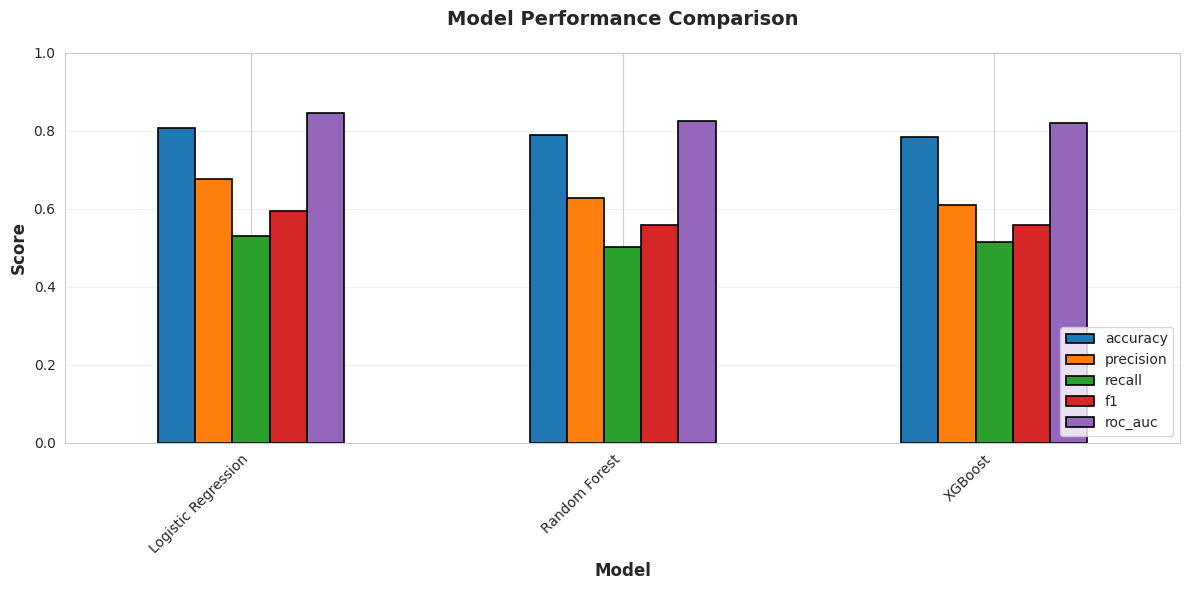

    Saved: 08_model_comparison.png

Creating Visualization 9: Confusion Matrices...


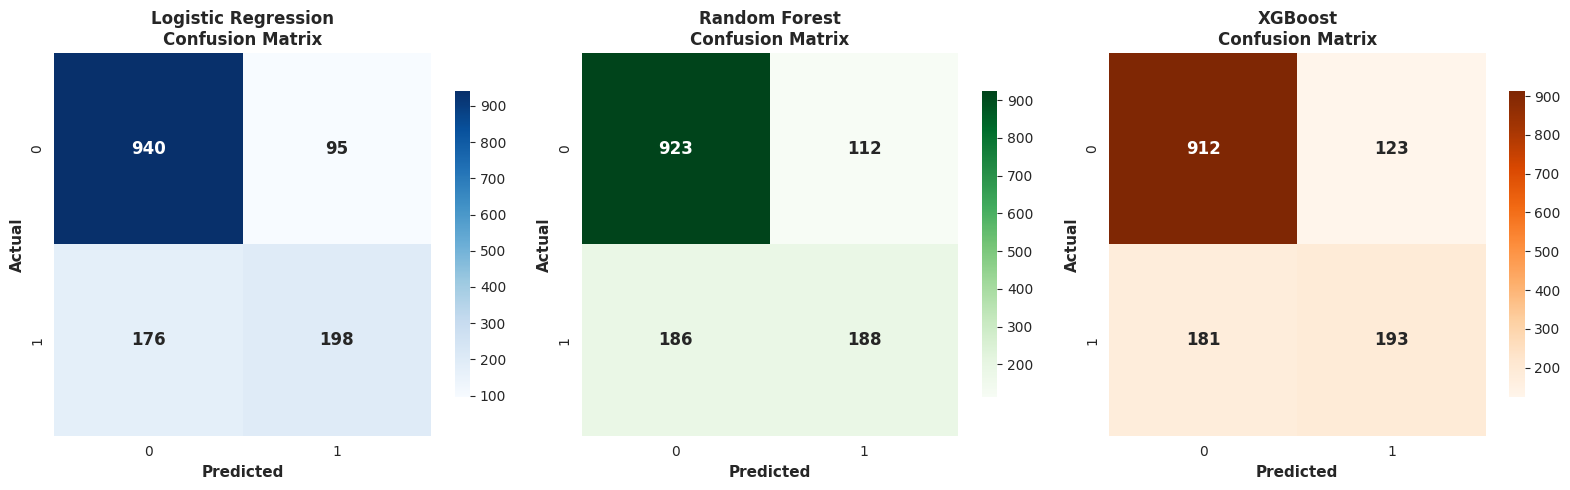

   Saved: 09_confusion_matrices.png

 Creating Visualization 10: ROC Curves...


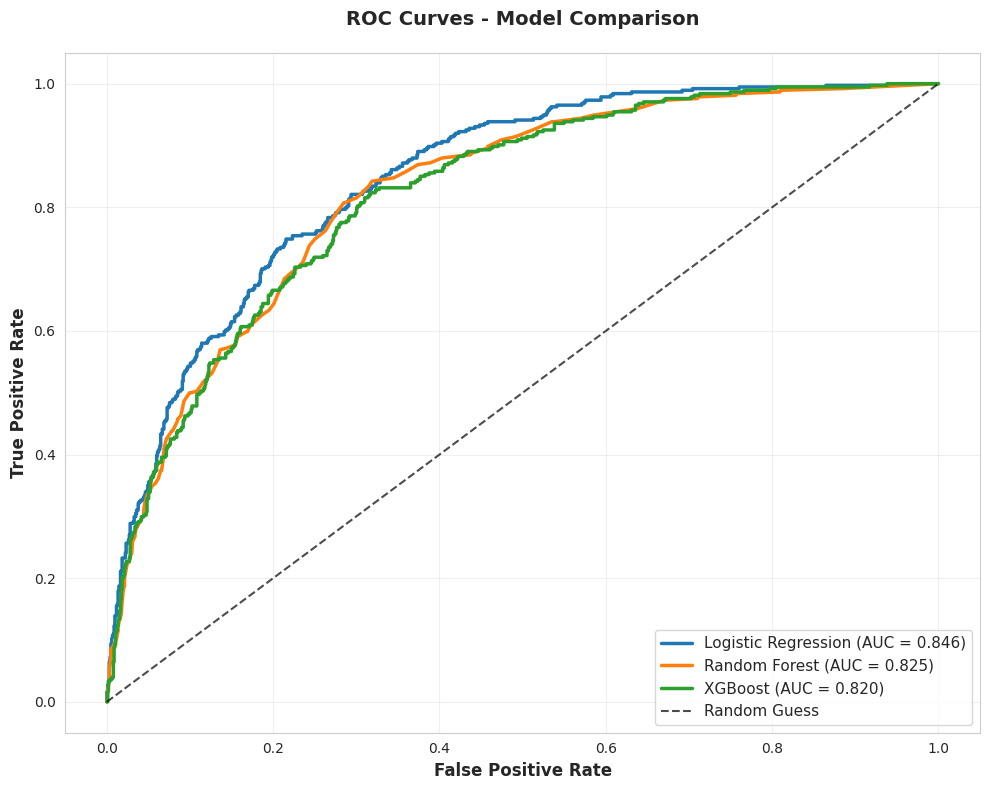


 Creating Visualization 11: Precision-Recall (PR) Curves...


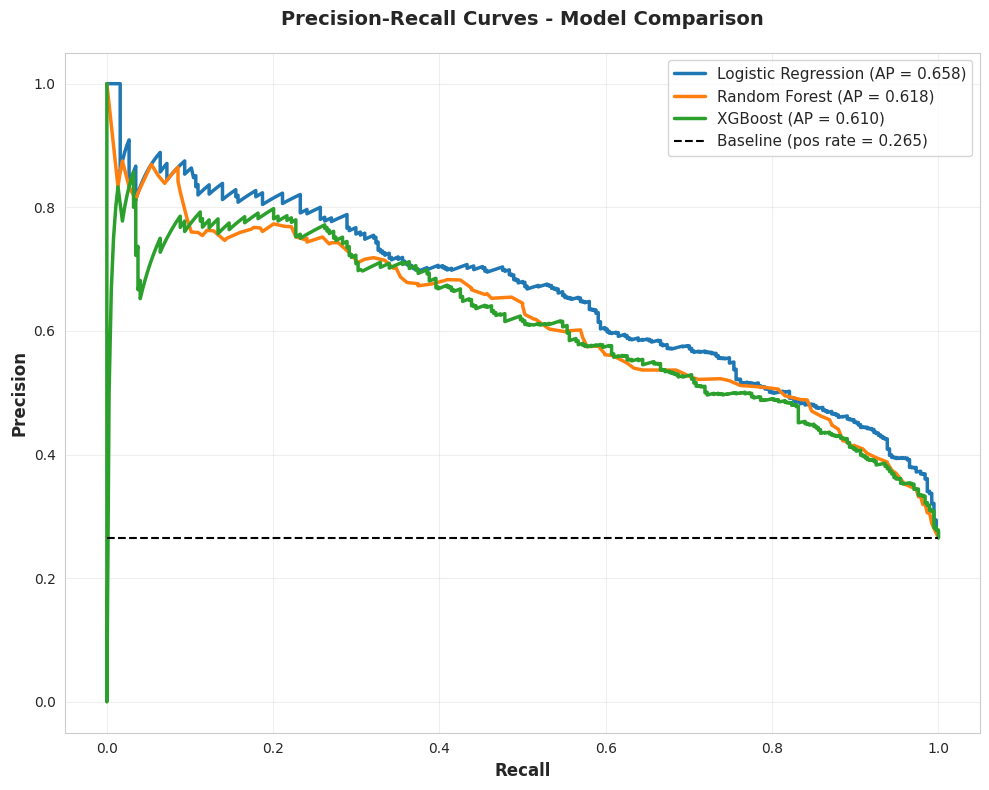

    Saved: 11_pr_curves.png

Average Precision (AP) scores:
  Logistic Regression: 0.6585
  Random Forest      : 0.6176
  XGBoost            : 0.6096


In [66]:
results_df = pd.DataFrame(results).T
print("\n Model Performance Comparison:")
display(results_df.round(4))

# Find best model
best_model = results_df['roc_auc'].idxmax()
print(f"\n🏆 Best Model (by ROC-AUC): {best_model} ({results_df.loc[best_model, 'roc_auc']:.4f})")

# --- VISUALIZATION 8: Model Comparison ---
print("\n Creating Visualization 8: Model Comparison...")

fig, ax = plt.subplots(figsize=(12, 6))
results_df.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('08_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"    Saved: 08_model_comparison.png")

# --- VISUALIZATION 9: Confusion Matrices ---
print("\nCreating Visualization 9: Confusion Matrices...")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models_data = [
    ('Logistic Regression', y_pred_lr, 'Blues'),
    ('Random Forest', y_pred_rf, 'Greens'),
    ('XGBoost', y_pred_xgb, 'Oranges')
]

for idx, (model_name, y_pred, cmap) in enumerate(models_data):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[idx],
                cbar_kws={"shrink": 0.8}, annot_kws={'fontsize': 12, 'fontweight': 'bold'})
    axes[idx].set_title(f'{model_name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('09_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"   Saved: 09_confusion_matrices.png")

# --- VISUALIZATION 10: ROC Curves ---
print("\n Creating Visualization 10: ROC Curves...")

plt.figure(figsize=(10, 8))

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Plot
plt.plot(fpr_lr, tpr_lr, linewidth=2.5, label=f'Logistic Regression (AUC = {results["Logistic Regression"]["roc_auc"]:.3f})')
plt.plot(fpr_rf, tpr_rf, linewidth=2.5, label=f'Random Forest (AUC = {results["Random Forest"]["roc_auc"]:.3f})')
plt.plot(fpr_xgb, tpr_xgb, linewidth=2.5, label=f'XGBoost (AUC = {results["XGBoost"]["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Guess', alpha=0.7)

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('10_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# --- VISUALIZATION 11: Precision-Recall (PR) Curves ---
print("\n Creating Visualization 11: Precision-Recall (PR) Curves...")
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

# Compute PR curves and average precision
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
ap_lr = average_precision_score(y_test, y_pred_proba_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
ap_rf = average_precision_score(y_test, y_pred_proba_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
ap_xgb = average_precision_score(y_test, y_pred_proba_xgb)

# Plot PR curves
plt.plot(recall_lr, precision_lr, linewidth=2.5, label=f'Logistic Regression (AP = {ap_lr:.3f})')
plt.plot(recall_rf, precision_rf, linewidth=2.5, label=f'Random Forest (AP = {ap_rf:.3f})')
plt.plot(recall_xgb, precision_xgb, linewidth=2.5, label=f'XGBoost (AP = {ap_xgb:.3f})')

# Baseline: positive class ratio
pos_rate = y_test.mean()
plt.hlines(y=pos_rate, xmin=0, xmax=1, colors='k', linestyles='--', label=f'Baseline (pos rate = {pos_rate:.3f})')

plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision-Recall Curves - Model Comparison', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='upper right', fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('11_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"    Saved: 11_pr_curves.png")

# Print AP scores for quick reference
print("\nAverage Precision (AP) scores:")
print(f"  Logistic Regression: {ap_lr:.4f}")
print(f"  Random Forest      : {ap_rf:.4f}")
print(f"  XGBoost            : {ap_xgb:.4f}")



 Top 15 Most Important Features:


,Feature,Importance
3,TotalCharges,0.136665
4,ChargesPerMonth,0.126055
2,MonthlyCharges,0.123719
1,tenure,0.117580
5,ServiceCount,0.041838
14,InternetService_Fiber optic,0.035860
32,PaymentMethod_Electronic check,0.035725
8,gender_Male,0.023636
30,PaperlessBilling_Yes,0.023085
29,Contract_Two year,0.022863



 Creating Visualization 11: Feature Importance...


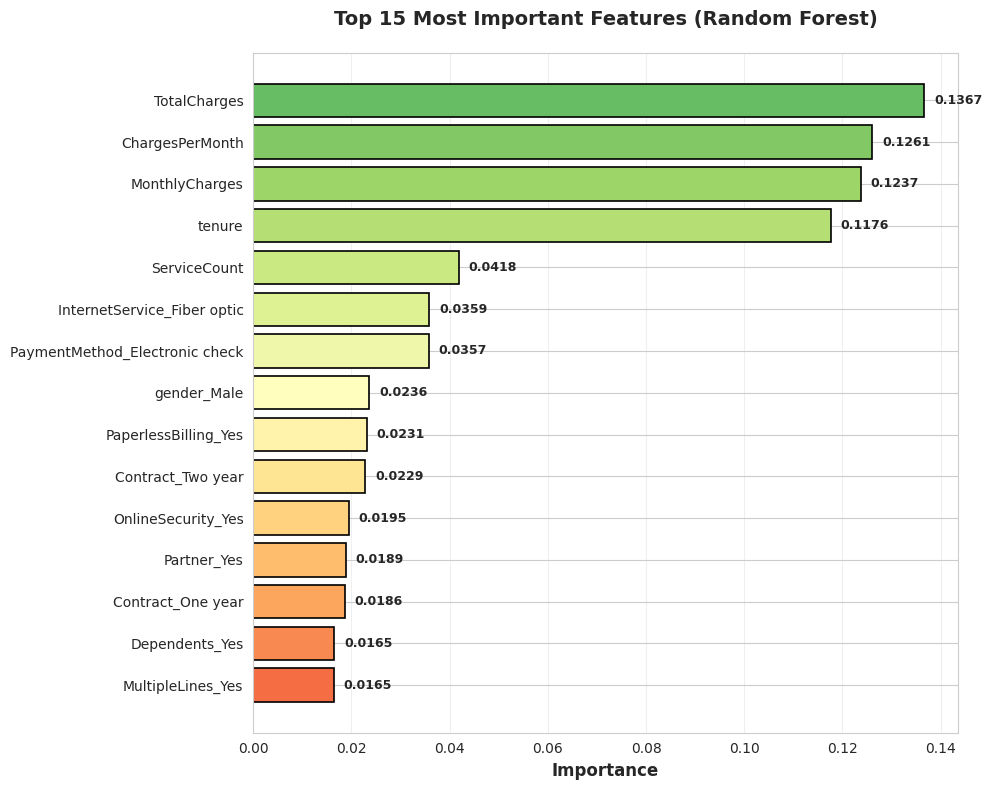

In [67]:
#FEATURE IMPORTANCE ANALYSIS

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 15 Most Important Features:")
display(feature_importance.head(15))

# --- VISUALIZATION 11: Feature Importance ---
print("\n Creating Visualization 11: Feature Importance...")

plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_features)))
plt.barh(range(len(top_features)), top_features['Importance'], color=colors, edgecolor='black', linewidth=1.2)
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top_features.iterrows()):
    plt.text(row['Importance'] + 0.002, i, f"{row['Importance']:.4f}", 
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('11_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


 Generating Gain/Lift charts for Random Forest model...


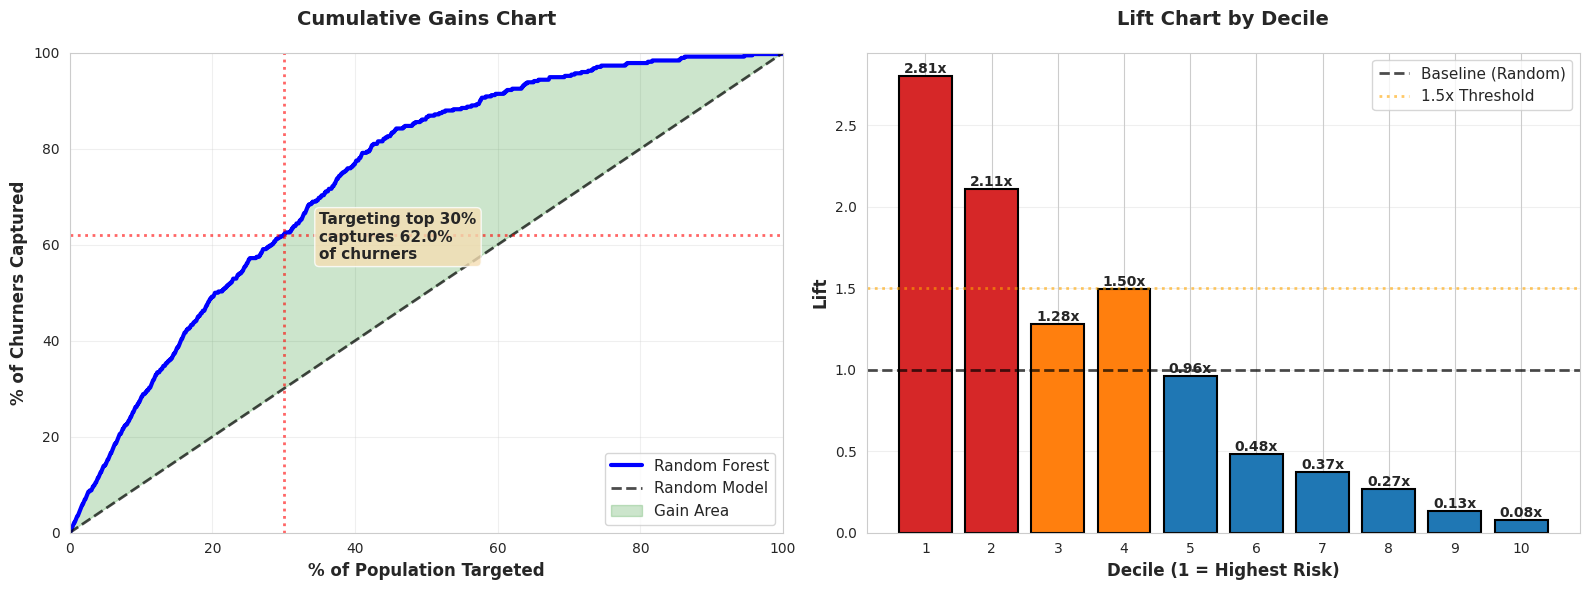


 GAIN & LIFT INSIGHTS:

 Targeting Efficiency:
   • Top 10% captures: 27.8% of churners (2.8x random)
   • Top 20% captures: 49.2% of churners (2.5x random)
   • Top 30% captures: 62.0% of churners (2.1x random)

 Model Effectiveness:
   • Top 10% are 2.81x more likely to churn
   • This means campaigns can be 2.81x more efficient

 Recommendation:
   • Focus on top 20% of customers (lift ≥1.5x)
   • This ensures cost-effective targeting


In [68]:

def create_gain_lift_charts(y_true, y_pred_proba, model_name='Model'):
    """Create Cumulative Gains and Lift charts"""
    
    # Create dataframe
    df_plot = pd.DataFrame({
        'actual': y_true.values,
        'predicted_proba': y_pred_proba
    })
    
    # Sort by probability
    df_plot = df_plot.sort_values('predicted_proba', ascending=False).reset_index(drop=True)
    
    # Calculate cumulative gains
    df_plot['cumulative_actual'] = df_plot['actual'].cumsum()
    df_plot['cumulative_percent_actual'] = df_plot['cumulative_actual'] / df_plot['actual'].sum() * 100
    df_plot['cumulative_percent_population'] = (df_plot.index + 1) / len(df_plot) * 100
    
    # Calculate lift by deciles
    df_plot['decile'] = pd.qcut(df_plot.index, q=10, labels=False, duplicates='drop') + 1
    lift_by_decile = df_plot.groupby('decile').agg({
        'actual': 'mean',
        'cumulative_percent_population': 'max'
    }).reset_index()
    
    baseline_rate = df_plot['actual'].mean()
    lift_by_decile['lift'] = lift_by_decile['actual'] / baseline_rate
    
    # Create visualizations
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- CUMULATIVE GAINS CHART ---
    ax1 = axes[0]
    
    ax1.plot(df_plot['cumulative_percent_population'], 
             df_plot['cumulative_percent_actual'],
             'b-', linewidth=3, label=f'{model_name}')
    ax1.plot([0, 100], [0, 100], 'k--', linewidth=2, label='Random Model', alpha=0.7)
    
    ax1.fill_between(df_plot['cumulative_percent_population'],
                     df_plot['cumulative_percent_actual'],
                     df_plot['cumulative_percent_population'],
                     where=(df_plot['cumulative_percent_actual'] >= df_plot['cumulative_percent_population']),
                     alpha=0.2, color='green', label='Gain Area')
    
    ax1.set_xlabel('% of Population Targeted', fontsize=12, fontweight='bold')
    ax1.set_ylabel('% of Churners Captured', fontsize=12, fontweight='bold')
    ax1.set_title('Cumulative Gains Chart', fontsize=14, fontweight='bold', pad=20)
    ax1.legend(loc='lower right', fontsize=11)
    ax1.grid(alpha=0.3)
    ax1.set_xlim([0, 100])
    ax1.set_ylim([0, 100])
    
    # Reference lines
    ax1.axvline(x=30, color='red', linestyle=':', alpha=0.6, linewidth=2)
    capture_at_30 = df_plot[df_plot['cumulative_percent_population'] <= 30]['cumulative_percent_actual'].iloc[-1]
    ax1.axhline(y=capture_at_30, color='red', linestyle=':', alpha=0.6, linewidth=2)
    
    ax1.text(35, capture_at_30 - 5, 
             f'Targeting top 30%\ncaptures {capture_at_30:.1f}%\nof churners',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             fontsize=11, fontweight='bold')
    
    # --- LIFT CHART ---
    ax2 = axes[1]
    
    colors_lift = ['#d62728' if x > 1.5 else '#ff7f0e' if x > 1 else '#1f77b4' for x in lift_by_decile['lift']]
    bars = ax2.bar(lift_by_decile['decile'], lift_by_decile['lift'], 
                   color=colors_lift, edgecolor='black', linewidth=1.5)
    
    ax2.axhline(y=1, color='k', linestyle='--', linewidth=2, label='Baseline (Random)', alpha=0.7)
    ax2.axhline(y=1.5, color='orange', linestyle=':', linewidth=2, label='1.5x Threshold', alpha=0.6)
    
    ax2.set_xlabel('Decile (1 = Highest Risk)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Lift', fontsize=12, fontweight='bold')
    ax2.set_title('Lift Chart by Decile', fontsize=14, fontweight='bold', pad=20)
    ax2.set_xticks(range(1, 11))
    ax2.grid(axis='y', alpha=0.3)
    ax2.legend(fontsize=11)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}x',
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('12_gain_lift_charts.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print("\n GAIN & LIFT INSIGHTS:")

    
    top_10_capture = df_plot[df_plot['cumulative_percent_population'] <= 10]['cumulative_percent_actual'].iloc[-1]
    top_20_capture = df_plot[df_plot['cumulative_percent_population'] <= 20]['cumulative_percent_actual'].iloc[-1]
    
    print(f"\n Targeting Efficiency:")
    print(f"   • Top 10% captures: {top_10_capture:.1f}% of churners ({top_10_capture/10:.1f}x random)")
    print(f"   • Top 20% captures: {top_20_capture:.1f}% of churners ({top_20_capture/20:.1f}x random)")
    print(f"   • Top 30% captures: {capture_at_30:.1f}% of churners ({capture_at_30/30:.1f}x random)")
    
    top_decile_lift = lift_by_decile[lift_by_decile['decile'] == 1]['lift'].values[0]
    print(f"\n Model Effectiveness:")
    print(f"   • Top 10% are {top_decile_lift:.2f}x more likely to churn")
    print(f"   • This means campaigns can be {top_decile_lift:.2f}x more efficient")
    
    optimal_decile = lift_by_decile[lift_by_decile['lift'] >= 1.5]['decile'].max()
    optimal_pct = optimal_decile * 10
    print(f"\n Recommendation:")
    print(f"   • Focus on top {optimal_pct:.0f}% of customers (lift ≥1.5x)")
    print(f"   • This ensures cost-effective targeting")
    
    return df_plot, lift_by_decile

# Run gain/lift analysis with best model (use Random Forest probabilities)
print("\n Generating Gain/Lift charts for Random Forest model...")
df_gains, lift_data = create_gain_lift_charts(y_test, y_pred_proba_rf, model_name='Random Forest')


🔧 Generating predictions for full dataset...
 Generated 7,043 predictions

🔧 Running A/B test simulation...

 Simulating A/B Test:
   • Campaign effect: 25% churn reduction
   • Target group: Top 30% by churn risk


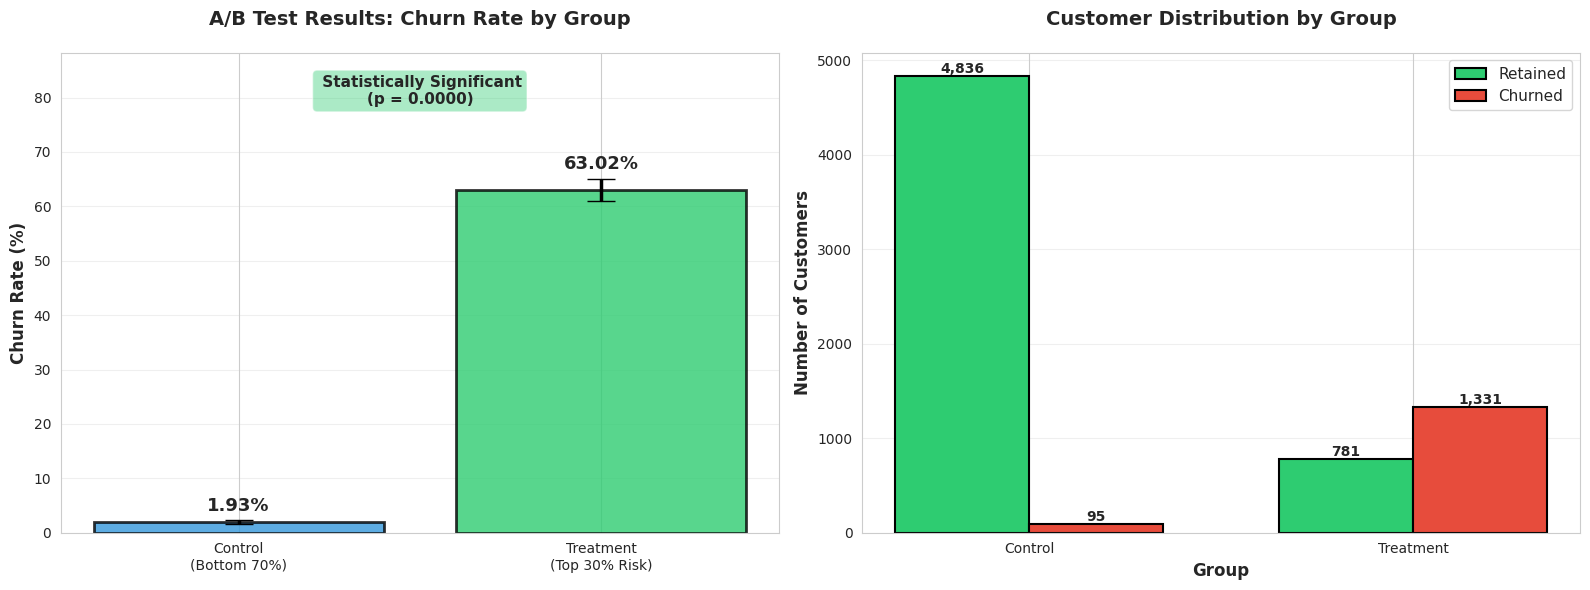


 A/B TEST RESULTS

 Sample Sizes:
   • Control: 4,931 customers
   • Treatment: 2,112 customers

 Churn Rates:
   • Control: 1.93%
   • Treatment: 63.02%

 Campaign Impact:
   • Absolute reduction: -61.09 percentage points
   • Relative reduction: -3171.1%
   • Customers saved: 443

 Statistical Significance:
   • Chi-square: 3414.1485
   • P-value: 0.0000
   • Result:  SIGNIFICANT (p < 0.05)
   • 95% CI Control: 1.93% ± 0.38%
   • 95% CI Treatment: 63.02% ± 2.06%

 Business Impact (Annual):
   • Avg monthly revenue: $64.76
   • Revenue saved: $344,273.16

 ROI Analysis (@ $50/customer):
   • Campaign cost: $105,600.00
   • Net benefit: $238,673.16
   • ROI: 226.0%


In [ ]:

def simulate_ab_test(df_original, y_pred_proba, campaign_effect=0.25, target_top_pct=30):
    """Simulate A/B test for retention campaign"""
    
    print(f"\n Simulating A/B Test:")
    print(f"   • Campaign effect: {campaign_effect*100:.0f}% churn reduction")
    print(f"   • Target group: Top {target_top_pct}% by churn risk")
    
    # Create simulation dataframe
    df_sim = df_original.copy()
    
    # Ensure Churn is numeric (convert if needed)
    if df_sim['Churn'].dtype == 'object':
        df_sim['Churn'] = df_sim['Churn'].map({'Yes': 1, 'No': 0})
    
    df_sim['churn_probability'] = y_pred_proba
    df_sim = df_sim.sort_values('churn_probability', ascending=False).reset_index(drop=True)
    
    # Assign groups
    cutoff = int(len(df_sim) * target_top_pct / 100)
    df_sim['group'] = 'Control'
    df_sim.loc[:cutoff-1, 'group'] = 'Treatment'
    
    # Simulate campaign effect
    df_sim['simulated_churn'] = df_sim['Churn'].copy().astype(int)
    treatment_churners = df_sim[(df_sim['group'] == 'Treatment') & (df_sim['Churn'] == 1)]
    n_prevented = int(len(treatment_churners) * campaign_effect)
    
    if n_prevented > 0:
        prevented_indices = np.random.choice(treatment_churners.index, size=n_prevented, replace=False)
        df_sim.loc[prevented_indices, 'simulated_churn'] = 0
    
    # Calculate metrics
    control_data = df_sim[df_sim['group'] == 'Control']
    treatment_data = df_sim[df_sim['group'] == 'Treatment']
    
    control_churn_rate = control_data['simulated_churn'].mean()
    treatment_churn_rate = treatment_data['simulated_churn'].mean()
    
    # Statistical test
    contingency_table = pd.crosstab(df_sim['group'], df_sim['simulated_churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Confidence intervals
    control_n = len(control_data)
    treatment_n = len(treatment_data)
    control_ci = 1.96 * np.sqrt(control_churn_rate * (1 - control_churn_rate) / control_n)
    treatment_ci = 1.96 * np.sqrt(treatment_churn_rate * (1 - treatment_churn_rate) / treatment_n)
    
    # --- VISUALIZATIONS ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Churn rates
    ax1 = axes[0]
    groups = ['Control\n(Bottom 70%)', 'Treatment\n(Top 30% Risk)']
    churn_rates = [control_churn_rate * 100, treatment_churn_rate * 100]
    colors = ['#3498db', '#2ecc71']
    
    bars = ax1.bar(groups, churn_rates, color=colors, edgecolor='black', linewidth=2, alpha=0.8)
    ax1.errorbar(groups, churn_rates, 
                 yerr=[control_ci * 100, treatment_ci * 100],
                 fmt='none', color='black', capsize=10, linewidth=2.5)
    
    ax1.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
    ax1.set_title('A/B Test Results: Churn Rate by Group', fontsize=14, fontweight='bold', pad=20)
    ax1.set_ylim([0, max(churn_rates) * 1.4])
    ax1.grid(axis='y', alpha=0.3)
    
    for i, (bar, rate) in enumerate(zip(bars, churn_rates)):
        ci = control_ci * 100 if i == 0 else treatment_ci * 100
        ax1.text(bar.get_x() + bar.get_width()/2, rate + ci + 1,
                f'{rate:.2f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=13)
    
    if p_value < 0.05:
        ax1.text(0.5, max(churn_rates) * 1.25, 
                f' Statistically Significant\n(p = {p_value:.4f})',
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.4))
    else:
        ax1.text(0.5, max(churn_rates) * 1.25, 
                f' Not Significant\n(p = {p_value:.4f})',
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='#e74c3c', alpha=0.4))
    
    # Plot 2: Distribution
    ax2 = axes[1]
    group_data = pd.DataFrame({
        'Group': ['Control', 'Treatment'],
        'Retained': [control_n - control_data['simulated_churn'].sum(), 
                     treatment_n - treatment_data['simulated_churn'].sum()],
        'Churned': [control_data['simulated_churn'].sum(), 
                    treatment_data['simulated_churn'].sum()]
    })
    
    x = np.arange(len(group_data))
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, group_data['Retained'], width, label='Retained', 
                    color='#2ecc71', edgecolor='black', linewidth=1.5)
    bars2 = ax2.bar(x + width/2, group_data['Churned'], width, label='Churned', 
                    color='#e74c3c', edgecolor='black', linewidth=1.5)
    
    ax2.set_xlabel('Group', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
    ax2.set_title('Customer Distribution by Group', fontsize=14, fontweight='bold', pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(group_data['Group'])
    ax2.legend(fontsize=11)
    ax2.grid(axis='y', alpha=0.3)
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('13_ab_test_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # --- RESULTS ---
    print("\n" + "="*60)
    print(" A/B TEST RESULTS")
    print("="*60)
    
    print(f"\n Sample Sizes:")
    print(f"   • Control: {control_n:,} customers")
    print(f"   • Treatment: {treatment_n:,} customers")
    
    print(f"\n Churn Rates:")
    print(f"   • Control: {control_churn_rate*100:.2f}%")
    print(f"   • Treatment: {treatment_churn_rate*100:.2f}%")
    
    abs_reduction = (control_churn_rate - treatment_churn_rate) * 100
    rel_reduction = ((control_churn_rate - treatment_churn_rate) / control_churn_rate) * 100 if control_churn_rate > 0 else 0
    
    print(f"\n Campaign Impact:")
    print(f"   • Absolute reduction: {abs_reduction:.2f} percentage points")
    print(f"   • Relative reduction: {rel_reduction:.1f}%")
    print(f"   • Customers saved: {n_prevented:,}")
    
    print(f"\n Statistical Significance:")
    print(f"   • Chi-square: {chi2:.4f}")
    print(f"   • P-value: {p_value:.4f}")
    print(f"   • Result: {' SIGNIFICANT (p < 0.05)' if p_value < 0.05 else '❌ NOT SIGNIFICANT (p ≥ 0.05)'}")
    print(f"   • 95% CI Control: {control_churn_rate*100:.2f}% ± {control_ci*100:.2f}%")
    print(f"   • 95% CI Treatment: {treatment_churn_rate*100:.2f}% ± {treatment_ci*100:.2f}%")
    
    # Business impact
    avg_monthly = df_original['MonthlyCharges'].mean()
    annual_saved = n_prevented * avg_monthly * 12
    
    print(f"\n Business Impact (Annual):")
    print(f"   • Avg monthly revenue: ${avg_monthly:.2f}")
    print(f"   • Revenue saved: ${annual_saved:,.2f}")
    
    # ROI
    cost_per_customer = 50
    total_cost = treatment_n * cost_per_customer
    net_benefit = annual_saved - total_cost
    roi = (net_benefit / total_cost) * 100 if total_cost > 0 else 0
    
    print(f"\n ROI Analysis (@ ${cost_per_customer}/customer):")
    print(f"   • Campaign cost: ${total_cost:,.2f}")
    print(f"   • Net benefit: ${net_benefit:,.2f}")
    print(f"   • ROI: {roi:.1f}%")
    
    return df_sim, {
        'control_rate': control_churn_rate,
        'treatment_rate': treatment_churn_rate,
        'p_value': p_value,
        'customers_saved': n_prevented,
        'revenue_saved': annual_saved,
        'roi': roi
    }

# Run A/B test simulation
# IMPORTANT: We need to create predictions for the FULL dataset, not just test set
print("\nGenerating predictions for full dataset...")

# Get predictions for entire dataset
X_full_scaled = X_encoded.copy()
X_full_scaled[numerical_cols] = scaler.transform(X_encoded[numerical_cols])
y_pred_proba_full = rf_model.predict_proba(X_full_scaled)[:, 1]

print(f" Generated {len(y_pred_proba_full):,} predictions")

print("\n Running A/B test simulation...")
df_ab, ab_results = simulate_ab_test(
    df_clean, 
    y_pred_proba_full,  # Use full dataset predictions
    campaign_effect=0.25, 
    target_top_pct=30
)